<a href="https://colab.research.google.com/github/polyake/bigdata_hf_2022/blob/main/BigDataHF_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

# Fájl beolvasása:

In [5]:
#teljes adathalmaz
#df_base = pd.read_excel('/content/drive/MyDrive/globalterrorismdb_0522dist.xlsx')
#df_base

             eventid  iyear  imonth  iday           approxdate  extended  \
0       197000000001   1970       7     2                  NaN         0   
1       197000000002   1970       0     0                  NaN         0   
2       197001000001   1970       1     0                  NaN         0   
3       197001000002   1970       1     0                  NaN         0   
4       197001000003   1970       1     0                  NaN         0   
...              ...    ...     ...   ...                  ...       ...   
209701  202012310015   2020      12    31  2020-12-31 00:00:00         0   
209702  202012310016   2020      12    31  2020-12-31 00:00:00         0   
209703  202012310017   2020      12    31                  NaN         0   
209704  202012310018   2020      12    31                  NaN         0   
209705  202012310019   2020      12    31                  NaN         1   

       resolution  country         country_txt  region  ... addnotes  \
0             N

In [2]:
#szűkített adathalmaz
df = pd.read_parquet('/content/drive/MyDrive/df_survived.parquet.gzip')

In [3]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
2,197001220001,1970,1,22,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,1.000000
4,197003060001,1970,3,6,1,83,Guatemala,2,Central America & Caribbean,Guatemala,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
5,197003110001,1970,3,11,1,30,Brazil,3,South America,Sao Paulo,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
6,197003140001,1970,3,14,1,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,2.0,Hostage(s) released by perpetrators,5.0,None,PGIS,0,1,1,1,1.000000
8,197003240002,1970,3,24,1,58,Dominican Republic,2,Central America & Caribbean,National,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16557,201005190003,2010,5,19,1,41,Central African Republic,11,Sub-Saharan Africa,Haute-Kotto,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Two Civilia...",ISVG,1,1,0,1,0.000000
16558,201005240001,2010,5,24,0,160,Philippines,5,Southeast Asia,Davao Oriental,...,6.0,Combination,1.0,"National Counterterrorism Center, ""Three Soldi...",ISVG,0,0,0,0,0.333333
16559,201005270009,2010,5,27,1,104,Kenya,11,Sub-Saharan Africa,North Eastern,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Four Civili...",ISVG,1,1,0,1,0.000000
16564,201011290018,2010,11,29,1,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,...,7.0,Unknown,4.0,"News, ""Pakistan: Militants Set Three Trucks on...",ISVG,-9,-9,0,-9,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eventid             8071 non-null   int64  
 1   iyear               8071 non-null   int64  
 2   imonth              8071 non-null   int64  
 3   iday                8071 non-null   int64  
 4   extended            8071 non-null   int64  
 5   country             8071 non-null   int64  
 6   country_txt         8071 non-null   object 
 7   region              8071 non-null   int64  
 8   region_txt          8071 non-null   object 
 9   provstate           8071 non-null   object 
 10  city                8051 non-null   object 
 11  latitude            7808 non-null   float64
 12  longitude           7808 non-null   float64
 13  specificity         8071 non-null   float64
 14  vicinity            8071 non-null   int64  
 15  summary             6938 non-null   object 
 16  crit1

# Adathalmaz további feltárása, szűrése:

In [ ]:
## fontos változók:
### numerikus: iyear, extended, nperps, ndays (imonth, iday?)
### (latitude, longtitude is erősebben korrelál a célváltozóval, de helyette a country, region stb.. változókat vesszük figyelembe)
### kategorikus: county, region, targtype1, gname, weaptype1

In [18]:
df[df["extended"]==0]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
2,197001220001,1970,1,22,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,1.000000
10,197003290001,1970,3,29,0,11,Argentina,3,South America,Buenos Aires,...,5.0,Successful Rescue,1.0,None,PGIS,0,1,1,1,1.000000
33,197008190001,1970,8,19,0,218,Uruguay,3,South America,Montevideo,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
43,197009120002,1970,9,12,0,603,United Kingdom,8,Western Europe,England,...,2.0,Hostage(s) released by perpetrators,3.0,None,PGIS,1,1,1,1,1.000000
59,197102210001,1971,2,21,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16541,200808180011,2008,8,18,0,160,Philippines,5,Southeast Asia,Lanao del Norte,...,2.0,Hostage(s) released by perpetrators,63.0,"GMA News, ""Central Mindanao Towns Tense after ...",ISVG,0,0,0,0,1.000000
16544,200903180019,2009,3,18,0,92,India,6,South Asia,Assam,...,7.0,Unknown,0.0,"Jane's Intelligence, ""KLNLF Militants Kill Civ...",ISVG,0,0,0,0,0.000000
16545,200903300028,2009,3,30,0,153,Pakistan,6,South Asia,Punjab,...,6.0,Combination,400.0,"National Counterterrorism Center, ""11 Police O...",ISVG,0,0,0,0,1.000000
16548,200906230008,2009,6,23,0,92,India,6,South Asia,Orissa,...,3.0,Hostage(s) escaped (not during rescue attempt),1.0,"National Counterterrorism Center, ""Two Governm...",ISVG,0,0,0,0,1.000000


In [19]:
df[((df["extended"]==1)&(df['ndays']<0))]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
1787,198601100011,1987,1,20,1,110,Lebanon,10,Middle East & North Africa,Beirut,...,2.0,Hostage(s) released by perpetrators,1.0,"""Waite expresses hope hostage crisis almost ov...",UMD Encyclopedia of World Terrorism 2012,0,1,1,1,1.00
3932,199802040002,1998,2,4,1,42,Chad,11,Sub-Saharan Africa,Moyen-Chari,...,2.0,Hostage(s) released by perpetrators,4.0,"“Four French Nationals Kidnapped in Chad,” Age...",CETIS,0,1,1,1,1.00
3933,199802150018,1998,2,15,1,177,Sierra Leone,11,Sub-Saharan Africa,Western,...,2.0,Hostage(s) released by perpetrators,5.0,"“Italian Friar, Four Others Kidnapped in Sierr...",CETIS,-9,-9,0,-9,1.00
3934,199802200003,1998,2,20,1,74,Georgia,7,Central Asia,Samegrelo-Zemo Svaneti,...,2.0,Hostage(s) released by perpetrators,10.0,"“Terrorists release all hostages in Georgia,” ...",CETIS,0,1,1,1,1.00
3944,199806000000,1998,6,0,1,45,Colombia,3,South America,Unknown,...,6.0,Combination,1.0,"Edward F. Mickolus, Terrorism, 1996-2001: A Ch...",CETIS,0,1,1,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,201002190001,2010,2,19,1,41,Central African Republic,11,Sub-Saharan Africa,Mbomou,...,2.0,Hostage(s) released by perpetrators,2.0,"Jane’s Intelligence, “LRA Militants Attack Cit...",ISVG,1,1,0,1,0.05
16557,201005190003,2010,5,19,1,41,Central African Republic,11,Sub-Saharan Africa,Haute-Kotto,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Two Civilia...",ISVG,1,1,0,1,0.00
16559,201005270009,2010,5,27,1,104,Kenya,11,Sub-Saharan Africa,North Eastern,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Four Civili...",ISVG,1,1,0,1,0.00
16564,201011290018,2010,11,29,1,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,...,7.0,Unknown,4.0,"News, ""Pakistan: Militants Set Three Trucks on...",ISVG,-9,-9,0,-9,1.00


sok olyan eset van, ahol az ndays nem mond semmit, mivel nem tartott 1 napnál tovább a támadás, illetve az extended=1 esetben is számottevő azon esetek száma, ahol nem ismert az ndays értéke --> kihagyjuk a magyarázó változók közül

In [23]:
df.groupby(by=df["nperps"]).count()["eventid"]

nperps
-99.0      5055
 0.0          7
 1.0         90
 2.0        165
 3.0        211
 4.0        246
 5.0        178
 6.0        121
 7.0         60
 8.0         55
 9.0         23
 10.0        94
 11.0        15
 12.0        42
 13.0         4
 14.0         6
 15.0        74
 16.0         2
 17.0         2
 19.0         2
 20.0        85
 21.0         3
 22.0         2
 23.0         1
 24.0        13
 25.0        23
 26.0         1
 30.0        84
 35.0         2
 36.0         5
 40.0        28
 41.0         1
 50.0        46
 51.0         1
 60.0        11
 70.0         4
 80.0         5
 100.0       38
 101.0        3
 130.0        2
 140.0        1
 150.0        5
 156.0        1
 200.0       19
 250.0        1
 300.0        8
 400.0        3
 600.0        1
 700.0        4
 1000.0       1
Name: eventid, dtype: int64

nperps változóból szintén az esetek több, mint felében nem ismert valójában az érték (-99) --> kihagyjuk a magyarázó változók közül

## Modellezéshez használt adathalmaz(ok) kialakítása:

In [49]:
cols_to_model = ['iyear', 'extended', 'country', 'region', 'targtype1', 'gname', 'weaptype1', 'survived']
df_model = df[cols_to_model]

In [50]:
cols_to_model_extended = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'provstate', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'target1', 'natlty1', 'gname', 'individual', 'weaptype1', 'INT_MISC', 'survived']
df_model_extended = df[cols_to_model_extended]

In [62]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iyear      8071 non-null   int64  
 1   extended   8071 non-null   int64  
 2   country    8071 non-null   int64  
 3   region     8071 non-null   int64  
 4   targtype1  8071 non-null   int64  
 5   gname      8071 non-null   object 
 6   weaptype1  8071 non-null   int64  
 7   survived   8071 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 567.5+ KB


In [63]:
df_model['gname'] = pd.factorize(df_model['gname'])[0]

<ipython-input-63-cda556bc5246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['gname'] = pd.factorize(df_model['gname'])[0]


In [64]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iyear      8071 non-null   int64  
 1   extended   8071 non-null   int64  
 2   country    8071 non-null   int64  
 3   region     8071 non-null   int64  
 4   targtype1  8071 non-null   int64  
 5   gname      8071 non-null   int64  
 6   weaptype1  8071 non-null   int64  
 7   survived   8071 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 567.5 KB


In [52]:
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8071 non-null   int64  
 1   imonth       8071 non-null   int64  
 2   iday         8071 non-null   int64  
 3   extended     8071 non-null   int64  
 4   country      8071 non-null   int64  
 5   region       8071 non-null   int64  
 6   provstate    8071 non-null   object 
 7   specificity  8071 non-null   float64
 8   vicinity     8071 non-null   int64  
 9   crit1        8071 non-null   int64  
 10  crit2        8071 non-null   int64  
 11  crit3        8071 non-null   int64  
 12  multiple     8070 non-null   float64
 13  suicide      8071 non-null   int64  
 14  attacktype1  8071 non-null   int64  
 15  targtype1    8071 non-null   int64  
 16  target1      8055 non-null   object 
 17  natlty1      8052 non-null   float64
 18  gname        8071 non-null   object 
 19  indiv

In [53]:
df_model_extended=df_model_extended.dropna(axis=0)
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8035 non-null   int64  
 1   imonth       8035 non-null   int64  
 2   iday         8035 non-null   int64  
 3   extended     8035 non-null   int64  
 4   country      8035 non-null   int64  
 5   region       8035 non-null   int64  
 6   provstate    8035 non-null   object 
 7   specificity  8035 non-null   float64
 8   vicinity     8035 non-null   int64  
 9   crit1        8035 non-null   int64  
 10  crit2        8035 non-null   int64  
 11  crit3        8035 non-null   int64  
 12  multiple     8035 non-null   float64
 13  suicide      8035 non-null   int64  
 14  attacktype1  8035 non-null   int64  
 15  targtype1    8035 non-null   int64  
 16  target1      8035 non-null   object 
 17  natlty1      8035 non-null   float64
 18  gname        8035 non-null   object 
 19  indiv

In [156]:
df_model_extended['provstate'], label_provstate = pd.factorize(df_model_extended['provstate'])
df_model_extended['gname'], label_gname = pd.factorize(df_model_extended['gname'])
df_model_extended['target1'], label_target1 = pd.factorize(df_model_extended['target1'])

In [55]:
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8035 non-null   int64  
 1   imonth       8035 non-null   int64  
 2   iday         8035 non-null   int64  
 3   extended     8035 non-null   int64  
 4   country      8035 non-null   int64  
 5   region       8035 non-null   int64  
 6   provstate    8035 non-null   int64  
 7   specificity  8035 non-null   float64
 8   vicinity     8035 non-null   int64  
 9   crit1        8035 non-null   int64  
 10  crit2        8035 non-null   int64  
 11  crit3        8035 non-null   int64  
 12  multiple     8035 non-null   float64
 13  suicide      8035 non-null   int64  
 14  attacktype1  8035 non-null   int64  
 15  targtype1    8035 non-null   int64  
 16  target1      8035 non-null   int64  
 17  natlty1      8035 non-null   float64
 18  gname        8035 non-null   int64  
 19  indiv

(array([2716.,  103.,   85.,  108.,   47.,  287.,  130.,   81.,   94.,
        4420.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

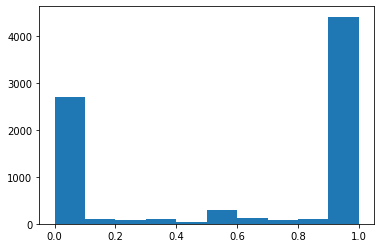

In [31]:
plt.hist(df_model["survived"])

(array([2711.,  103.,   84.,  107.,   47.,  285.,  129.,   80.,   94.,
        4395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

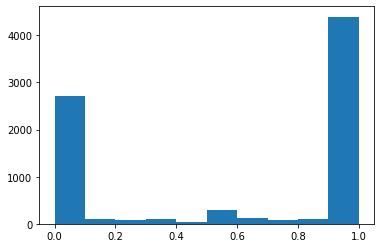

In [56]:
plt.hist(df_model_extended["survived"])

osztályok lehetnek: 

*   0.5-nél elvágva az adathalmazt
*   mindenki megmenekült (=1) vs van aki nem (!=1)





In [65]:
df_model['class1'] = np.where(df_model['survived']==1, 1, 0)
df_model['class2'] = np.where(df_model['survived']>0.5, 1, 0)

<ipython-input-65-208a08c0e83c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class1'] = np.where(df_model['survived']==1, 1, 0)
<ipython-input-65-208a08c0e83c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class2'] = np.where(df_model['survived']>0.5, 1, 0)


In [157]:
df_model_extended['class1'] = np.where(df_model_extended['survived']==1, 1, 0)
df_model_extended['class2'] = np.where(df_model_extended['survived']>0.5, 1, 0)

# Spark

In [ ]:
pip install pyspark

In [ ]:
import pyspark
import pyarrow
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
#import pyspark.pandas as ps
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
import pyspark.ml.evaluation as evals
import pyspark.ml.tuning as tune
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier

In [10]:
spark = SparkSession.builder.getOrCreate()
spark

In [66]:
new_df = spark.createDataFrame(df_model)

new_df_ext = spark.createDataFrame(df_model_extended)

In [67]:
feature_cols=new_df.columns
feature_cols = [e for e in feature_cols if e not in ("survived","class1", "class2")]

feature_cols_ext=new_df_ext.columns
feature_cols_ext = [e for e in feature_cols_ext if e not in ("survived","class1", "class2")]

In [68]:
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
credit_pipe = Pipeline(stages=[vec_assembler])
piped_data = credit_pipe.fit(new_df).transform(new_df)

vec_assembler_ext = VectorAssembler(inputCols=feature_cols_ext, outputCol="features_ext")
credit_pipe_ext = Pipeline(stages=[vec_assembler_ext])
piped_data_ext = credit_pipe_ext.fit(new_df_ext).transform(new_df_ext)

In [69]:
training, test = piped_data.randomSplit([.7, .3])

training_ext, test_ext = piped_data_ext.randomSplit([.7, .3])

In [70]:
gbt = GBTClassifier(featuresCol='features', labelCol='class2')
evaluator = BinaryClassificationEvaluator(labelCol='class2')
grid2=tune.ParamGridBuilder()
grid2=grid2.build()
cv2= tune.CrossValidator(estimator=gbt, estimatorParamMaps=grid2, evaluator=evaluator, numFolds=5)

gbt_ext = GBTClassifier(featuresCol='features_ext', labelCol='class2')
evaluator_ext = BinaryClassificationEvaluator(labelCol='class2')
grid2_ext=tune.ParamGridBuilder()
grid2_ext=grid2_ext.build()
cv2_ext= tune.CrossValidator(estimator=gbt_ext, estimatorParamMaps=grid2_ext, evaluator=evaluator_ext, numFolds=5)

In [71]:
%%time
models2=cv2.fit(training)
best_gbt=models2.bestModel

CPU times: user 836 ms, sys: 157 ms, total: 993 ms
Wall time: 1min 20s


In [72]:
%%time
models2_ext=cv2_ext.fit(training_ext)
best_gbt_ext=models2_ext.bestModel

CPU times: user 638 ms, sys: 118 ms, total: 756 ms
Wall time: 50.2 s


In [73]:
test_results2=best_gbt.transform(test)

test_results2_ext=best_gbt_ext.transform(test_ext)

In [74]:
print(evaluator.evaluate(test_results2))

0.8062668232760731


In [75]:
print(evaluator_ext.evaluate(test_results2_ext))

0.8243402952821789


In [82]:
feature_cols

['iyear', 'extended', 'country', 'region', 'targtype1', 'gname', 'weaptype1']

In [76]:
best_gbt.featureImportances

SparseVector(7, {0: 0.1953, 1: 0.0429, 2: 0.16, 3: 0.1013, 4: 0.2344, 5: 0.1466, 6: 0.1195})

In [78]:
feature_cols_ext

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'provstate',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'multiple',
 'suicide',
 'attacktype1',
 'targtype1',
 'target1',
 'natlty1',
 'gname',
 'individual',
 'weaptype1',
 'INT_MISC']

In [81]:
best_gbt_ext.featureImportances

SparseVector(22, {0: 0.112, 1: 0.0184, 2: 0.0362, 3: 0.0338, 4: 0.0624, 5: 0.0657, 6: 0.1158, 7: 0.0118, 8: 0.0025, 9: 0.0072, 11: 0.0097, 12: 0.0117, 13: 0.0049, 14: 0.0314, 15: 0.1298, 16: 0.0554, 17: 0.0585, 18: 0.1241, 19: 0.0014, 20: 0.0677, 21: 0.0395})

legfontosabb: iyear, provstate, targtype1, gname

In [83]:
tree = DecisionTreeClassifier(featuresCol='features', labelCol='class2')
evaluator = BinaryClassificationEvaluator(labelCol='class2')
grid3=tune.ParamGridBuilder()
grid3=grid3.build()
cv3= tune.CrossValidator(estimator=tree, estimatorParamMaps=grid3, evaluator=evaluator, numFolds=5)

tree_ext = DecisionTreeClassifier(featuresCol='features_ext', labelCol='class2')
evaluator_ext = BinaryClassificationEvaluator(labelCol='class2')
grid3_ext=tune.ParamGridBuilder()
grid3_ext=grid3_ext.build()
cv3_ext= tune.CrossValidator(estimator=tree_ext, estimatorParamMaps=grid3_ext, evaluator=evaluator_ext, numFolds=5)

In [84]:
%%time
pipelineCV = Pipeline(stages=[cv3])
models3 = pipelineCV.fit(training)
best_tree = models3.stages[-1].bestModel

CPU times: user 270 ms, sys: 47.3 ms, total: 317 ms
Wall time: 9.11 s


In [86]:
test_results3=best_tree.transform(test)
print(evaluator.evaluate(test_results3))

0.5912207843055002


In [85]:
%%time
pipelineCV_ext = Pipeline(stages=[cv3_ext])
models3_ext = pipelineCV_ext.fit(training_ext)
best_tree_ext = models3_ext.stages[-1].bestModel

CPU times: user 272 ms, sys: 54.1 ms, total: 326 ms
Wall time: 9.55 s


In [87]:
test_results3_ext=best_tree_ext.transform(test_ext)
print(evaluator_ext.evaluate(test_results3_ext))

0.6449815778473094


In [45]:
feature_cols

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'targtype1',
 'gname',
 'weaptype1']

In [46]:
display(best_tree)
print(best_tree.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_696dc573ce00, depth=5, numNodes=41, numClasses=2, numFeatures=9

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_696dc573ce00, depth=5, numNodes=41, numClasses=2, numFeatures=9
  If (feature 0 <= 1999.5)
   If (feature 0 <= 1996.5)
    If (feature 4 <= 9.5)
     If (feature 8 <= 5.5)
      If (feature 1 <= 6.5)
       Predict: 0.0
      Else (feature 1 > 6.5)
       Predict: 1.0
     Else (feature 8 > 5.5)
      Predict: 1.0
    Else (feature 4 > 9.5)
     If (feature 7 <= 276.5)
      Predict: 1.0
     Else (feature 7 > 276.5)
      Predict: 0.0
   Else (feature 0 > 1996.5)
    If (feature 2 <= 7.5)
     If (feature 1 <= 10.5)
      If (feature 1 <= 7.5)
       Predict: 0.0
      Else (feature 1 > 7.5)
       Predict: 1.0
     Else (feature 1 > 10.5)
      If (feature 1 <= 11.5)
       Predict: 0.0
      Else (feature 1 > 11.5)
       Predict: 1.0
    Else (feature 2 > 7.5)
     Predict: 1.0
  Else (feature 0 > 1999.5)
   If (feature 6 <= 13.5)
    If (feature 3 <= 0.5)
     If (feature 7 <= 276.5)
      Predict: 1.0
     Else (feature 

In [88]:
best_tree.featureImportances

SparseVector(7, {0: 0.4946, 1: 0.1381, 2: 0.0775, 4: 0.2284, 5: 0.0614})

In [90]:
display(best_tree_ext)
print(best_tree_ext.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_59b064f2697c, depth=5, numNodes=49, numClasses=2, numFeatures=22

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_59b064f2697c, depth=5, numNodes=49, numClasses=2, numFeatures=22
  If (feature 0 <= 1999.5)
   If (feature 16 <= 1106.5)
    If (feature 17 <= 7.0)
     If (feature 15 <= 3.5)
      Predict: 0.0
     Else (feature 15 > 3.5)
      If (feature 2 <= 14.5)
       Predict: 1.0
      Else (feature 2 > 14.5)
       Predict: 0.0
    Else (feature 17 > 7.0)
     If (feature 5 <= 11.5)
      Predict: 1.0
     Else (feature 5 > 11.5)
      If (feature 0 <= 1990.5)
       Predict: 1.0
      Else (feature 0 > 1990.5)
       Predict: 0.0
   Else (feature 16 > 1106.5)
    If (feature 4 <= 93.5)
     If (feature 1 <= 3.5)
      Predict: 0.0
     Else (feature 1 > 3.5)
      If (feature 4 <= 92.5)
       Predict: 1.0
      Else (feature 4 > 92.5)
       Predict: 0.0
    Else (feature 4 > 93.5)
     If (feature 15 <= 5.0)
      If (feature 8 <= 0.5)
       Predict: 1.0
      Else (feature 8 > 0.5)
       Predict: 0.0
     Else (feature 15 > 5.0

In [89]:
feature_cols_ext

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'provstate',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'multiple',
 'suicide',
 'attacktype1',
 'targtype1',
 'target1',
 'natlty1',
 'gname',
 'individual',
 'weaptype1',
 'INT_MISC']

In [91]:
best_tree_ext.featureImportances

SparseVector(22, {0: 0.4026, 1: 0.0058, 2: 0.0071, 3: 0.1064, 4: 0.0117, 5: 0.0038, 8: 0.006, 14: 0.113, 15: 0.2055, 16: 0.0353, 17: 0.103})

legfontosabb: iyear, extended, attacktype1, targtype1, natlty1

# Sklearn, fontos változók feltárása:

In [92]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.2 MB/s 


In [93]:
import graphviz
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.manifold import TSNE
import shap
from sklearn.ensemble import RandomForestClassifier

In [158]:
features=df_model.loc[:, ~df_model.columns.isin(['survived', 'class1', 'class2'])]

features_ext=df_model_extended.loc[:, ~df_model_extended.columns.isin(['survived', 'class1', 'class2'])]

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(features, df_model["class2"], test_size=0.3, random_state=42)

X_train_ext, X_test_ext, Y_train_ext, Y_test_ext = train_test_split(features_ext, df_model_extended["class2"], test_size=0.3, random_state=42)

## Döntési fa:

In [96]:
parameters = {'max_depth':range(1,6), 'random_state':[42], 'min_samples_leaf':range(1,10)}
dt=DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, parameters, cv=10)
dt_gs.fit(X_train,Y_train)


dt_ext=DecisionTreeClassifier()
dt_gs_ext = GridSearchCV(dt_ext, parameters, cv=10)
dt_gs_ext.fit(X_train_ext,Y_train_ext)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'random_state': [42]})

In [97]:
best_tree=dt_gs.best_estimator_

best_tree_ext=dt_gs_ext.best_estimator_

In [57]:
best_tree

DecisionTreeClassifier(max_depth=5, random_state=42)

In [98]:
best_tree_ext

DecisionTreeClassifier(max_depth=5, random_state=42)

In [99]:
prob=best_tree.predict_proba(X_test)
pred=best_tree.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(Y_test, prob[:,1], pos_label=1, sample_weight=None)
auc=metrics.auc(fpr,tpr)
accuracy=metrics.accuracy_score(Y_test, pred)

prob_ext=best_tree_ext.predict_proba(X_test_ext)
pred_ext=best_tree_ext.predict(X_test_ext)
fpr_ext,tpr_ext,thresholds_ext = metrics.roc_curve(Y_test_ext, prob_ext[:,1], pos_label=1, sample_weight=None)
auc_ext=metrics.auc(fpr_ext,tpr_ext)
accuracy_ext=metrics.accuracy_score(Y_test_ext, pred_ext)

In [100]:
auc, accuracy

(0.7679181629046967, 0.6994219653179191)

In [101]:
auc_ext, accuracy_ext

(0.7650898877199436, 0.7109083367897138)

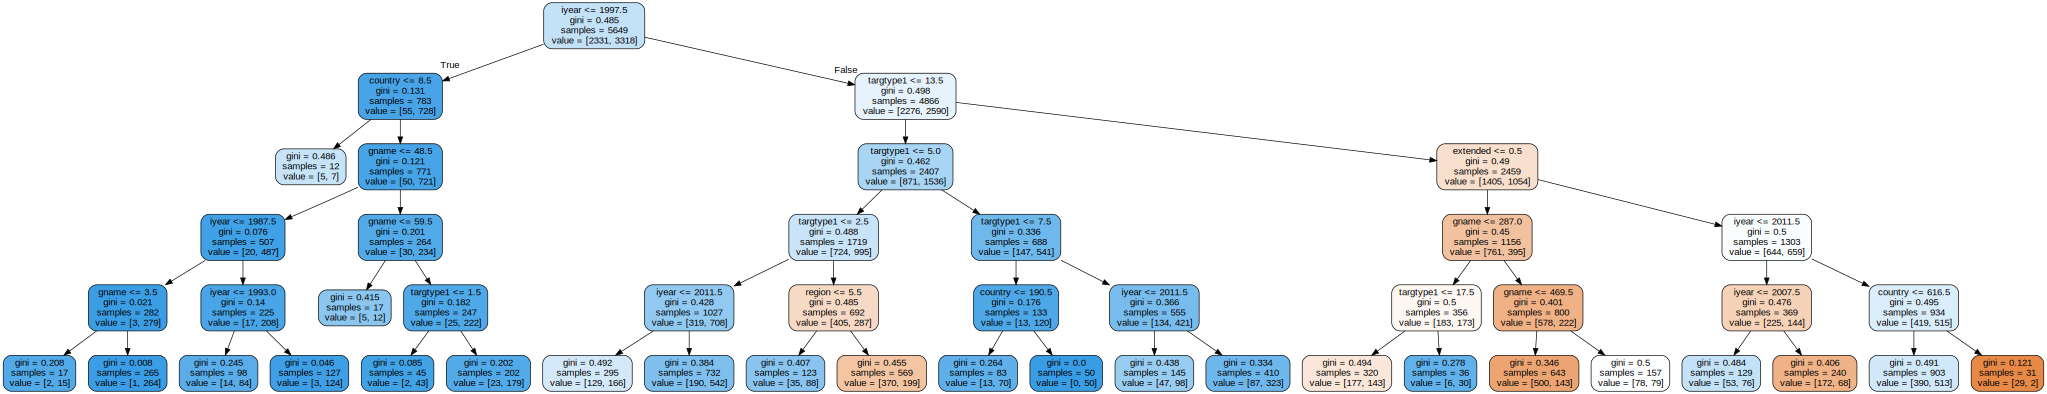

In [102]:
tree_viz=graphviz.Source(tree.export_graphviz(best_tree, filled=True, rounded=True,feature_names=list(features.columns)))
tree_viz.format = 'png'
tree_viz.render('dtree',view=True)
tree_viz

In [61]:
feature_importance_dt = pd.DataFrame(
    {'feature': list(features.columns),
     'importance': best_tree.feature_importances_
    })

In [62]:
feature_importance_dt.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.427289
4,targtype1,0.359160
5,gname,0.110658
3,region,0.064367
2,country,0.021844
6,weaptype1,0.016683
1,extended,0.000000


In [63]:
r1 = permutation_importance(best_tree, X_test, Y_test, n_repeats=30, random_state=42)

In [64]:
for i in r1.importances_mean.argsort()[::-1]:
    if r1.importances_mean[i] > 0.01:
        print(X_test.columns[i],
        f"{r1.importances_mean[i]:.3f}"
        f" +/- {r1.importances_std[i]:.3f}")

targtype1 0.101 +/- 0.008
iyear 0.059 +/- 0.007
region 0.013 +/- 0.003


In [110]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_original = tsne.fit_transform(features)

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8071 samples in 0.013s...
[t-SNE] Computed neighbors for 8071 samples in 0.294s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8071
[t-SNE] Computed conditional probabilities for sample 2000 / 8071
[t-SNE] Computed conditional probabilities for sample 3000 / 8071
[t-SNE] Computed conditional probabilities for sample 4000 / 8071
[t-SNE] Computed conditional probabilities for sample 5000 / 8071
[t-SNE] Computed conditional probabilities for sample 6000 / 8071
[t-SNE] Computed conditional probabilities for sample 7000 / 8071
[t-SNE] Computed conditional probabilities for sample 8000 / 8071
[t-SNE] Computed conditional probabilities for sample 8071 / 8071
[t-SNE] Mean sigma: 3.003960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.884117
[t-SNE] KL divergence after 300 iterations: 1.621148


In [111]:
d_original_tsne = {'tsne1': tsne_original[:,0], 'tsne2': tsne_original[:,1]}
tsne_to_plot = pd.DataFrame(data=d_original_tsne)
tsne_to_plot['class']=df_model['class2']

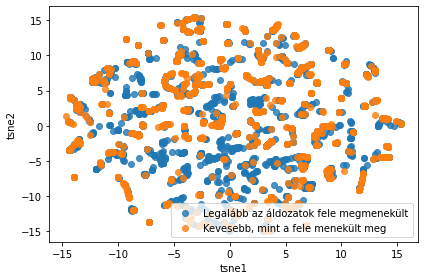

In [113]:
plt.scatter(tsne_to_plot[tsne_to_plot["class"]==1]['tsne1'],tsne_to_plot[tsne_to_plot["class"]==1]['tsne2'], alpha=0.8, label="Legalább az áldozatok fele megmenekült")
plt.scatter(tsne_to_plot[tsne_to_plot["class"]==0]['tsne1'],tsne_to_plot[tsne_to_plot["class"]==0]['tsne2'], alpha=0.8, label="Kevesebb, mint a fele menekült meg")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()

plt.tight_layout()

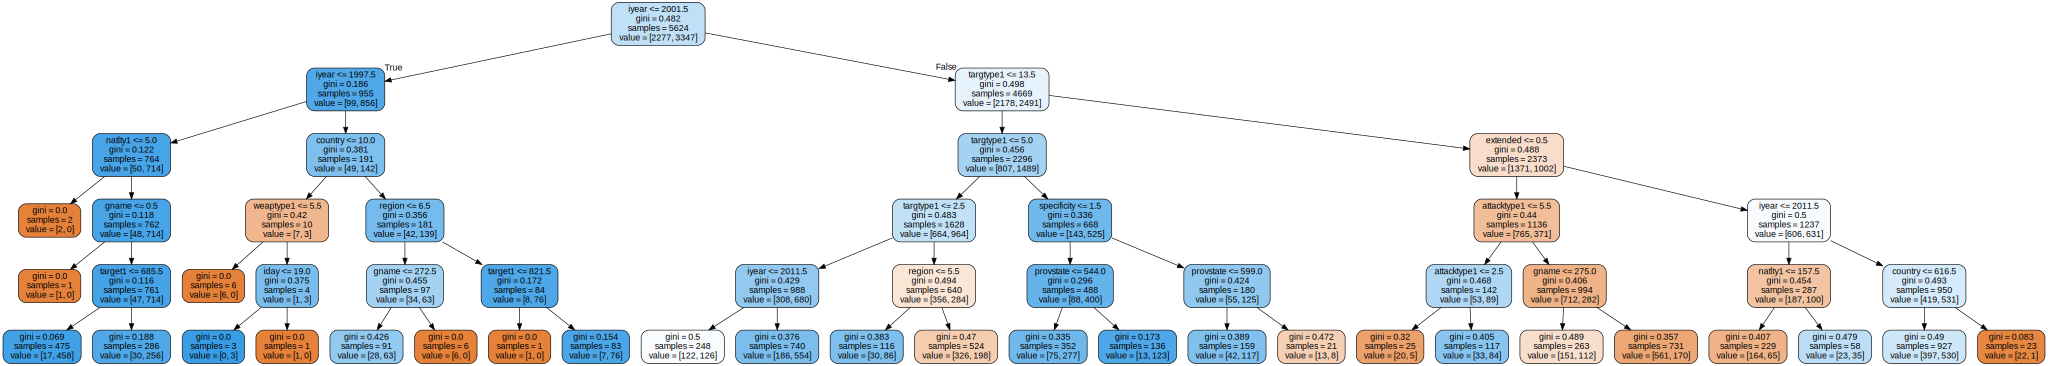

In [103]:
tree_viz_ext=graphviz.Source(tree.export_graphviz(best_tree_ext, filled=True, rounded=True,feature_names=list(features_ext.columns)))
tree_viz_ext.format = 'png'
tree_viz_ext.render('dtree',view=True)
tree_viz_ext

In [104]:
feature_importance_dt_ext = pd.DataFrame(
    {'feature': list(features_ext.columns),
     'importance': best_tree_ext.feature_importances_
    })

In [105]:
feature_importance_dt_ext.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.405234
15,targtype1,0.312947
14,attacktype1,0.062584
3,extended,0.061949
5,region,0.048095
18,gname,0.033557
4,country,0.025899
17,natlty1,0.020123
6,provstate,0.011462
7,specificity,0.006405


In [107]:
r1_ext = permutation_importance(best_tree_ext, X_test_ext, Y_test_ext, n_repeats=30, random_state=42)

In [108]:
for i in r1_ext.importances_mean.argsort()[::-1]:
    if r1_ext.importances_mean[i] > 0.01:
        print(X_test_ext.columns[i],
        f"{r1_ext.importances_mean[i]:.3f}"
        f" +/- {r1_ext.importances_std[i]:.3f}")

targtype1 0.076 +/- 0.008
iyear 0.047 +/- 0.006
extended 0.047 +/- 0.006
region 0.016 +/- 0.003
attacktype1 0.016 +/- 0.002
natlty1 0.014 +/- 0.004


## Random Forest:

In [160]:
parameters2 = {'n_estimators':[5,10,15,20,50], 'max_depth':range(1,11), 'random_state':[42], 'min_samples_leaf':range(1,10)}
rf=RandomForestClassifier()
rf_gs = GridSearchCV(rf, parameters2, cv=5)
rf_gs.fit(X_train,Y_train)

rf_ext=RandomForestClassifier()
rf_gs_ext = GridSearchCV(rf_ext, parameters2, cv=5)
rf_gs_ext.fit(X_train_ext,Y_train_ext)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 15, 20, 50],
                         'random_state': [42]})

In [162]:
best_rf=rf_gs.best_estimator_
best_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [163]:
best_rf_ext=rf_gs_ext.best_estimator_
best_rf_ext

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [164]:
prob2=best_rf.predict_proba(X_test)
pred2=best_rf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(Y_test, prob2[:,1], pos_label=1, sample_weight=None)
auc=metrics.auc(fpr,tpr)
accuracy=metrics.accuracy_score(Y_test, pred2)

prob2_ext=best_rf_ext.predict_proba(X_test_ext)
pred2_ext=best_rf_ext.predict(X_test_ext)
fpr_ext,tpr_ext,thresholds_ext = metrics.roc_curve(Y_test_ext, prob2_ext[:,1], pos_label=1, sample_weight=None)
auc_ext=metrics.auc(fpr_ext,tpr_ext)
accuracy_ext=metrics.accuracy_score(Y_test_ext, pred2_ext)

In [165]:
auc, accuracy

(0.8314370297537619, 0.7563996696944674)

In [166]:
auc_ext, accuracy_ext

(0.8288132415471583, 0.7540439651596847)

In [120]:
feature_importance_rf = pd.DataFrame(
    {'feature': list(features.columns),
     'importance': best_rf.feature_importances_
    })

In [121]:
feature_importance_rf.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.233807
5,gname,0.201483
4,targtype1,0.196284
2,country,0.132971
3,region,0.095368
1,extended,0.078826
6,weaptype1,0.061261


In [122]:
r2 = permutation_importance(best_rf, X_test, Y_test, n_repeats=30, random_state=42)

In [123]:
for i in r2.importances_mean.argsort()[::-1]:
    if r2.importances_mean[i] > 0.01:
        print(X_test.columns[i],
        f"{r2.importances_mean[i]:.3f}"
        f" +/- {r2.importances_std[i]:.3f}")

iyear 0.045 +/- 0.006
targtype1 0.044 +/- 0.005
gname 0.036 +/- 0.005
extended 0.026 +/- 0.005
region 0.022 +/- 0.005
country 0.020 +/- 0.004
weaptype1 0.010 +/- 0.004


In [124]:
feature_importance_rf_ext = pd.DataFrame(
    {'feature': list(features_ext.columns),
     'importance': best_rf_ext.feature_importances_
    })

In [125]:
feature_importance_rf_ext.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.118876
15,targtype1,0.110321
16,target1,0.109983
6,provstate,0.105141
18,gname,0.096982
3,extended,0.070040
17,natlty1,0.061775
5,region,0.059467
4,country,0.055868
2,iday,0.040832


In [126]:
r2_ext = permutation_importance(best_rf_ext, X_test_ext, Y_test_ext, n_repeats=30, random_state=42)

In [127]:
for i in r2_ext.importances_mean.argsort()[::-1]:
    if r2_ext.importances_mean[i] > 0.01:
        print(X_test_ext.columns[i],
        f"{r2_ext.importances_mean[i]:.3f}"
        f" +/- {r2_ext.importances_std[i]:.3f}")

extended 0.033 +/- 0.005
iyear 0.022 +/- 0.004
targtype1 0.021 +/- 0.004
gname 0.020 +/- 0.005
region 0.015 +/- 0.004
provstate 0.013 +/- 0.005
INT_MISC 0.011 +/- 0.002


In [128]:
explainer_rf = shap.Explainer(best_rf)
shap_values_rf = explainer_rf(X_test)

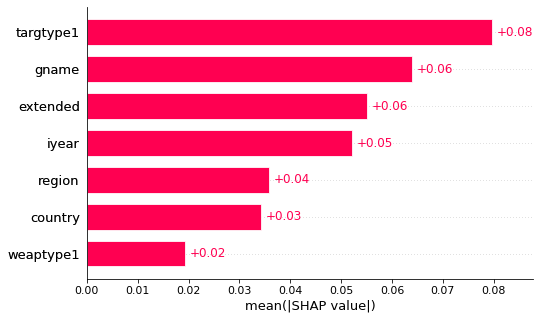

In [129]:
shap.plots.bar(shap_values_rf[:, :, 1])

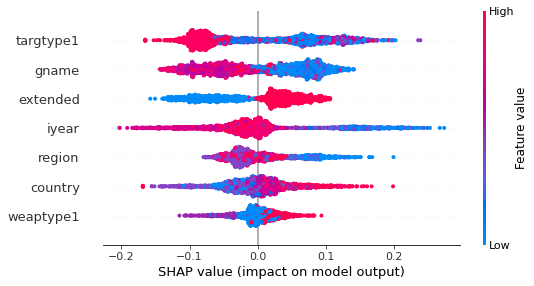

In [130]:
shap.plots.beeswarm(shap_values_rf[:, :, 1])

In [131]:
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

In [141]:
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1][6], X_test.iloc[6])

In [144]:
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1][8], X_test.iloc[8])

In [167]:
explainer_rf_ext = shap.Explainer(best_rf_ext)
shap_values_rf_ext = explainer_rf_ext(X_test_ext)

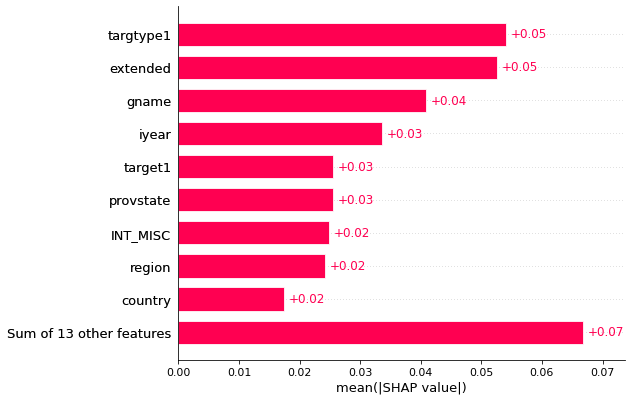

In [168]:
shap.plots.bar(shap_values_rf_ext[:, :, 1])

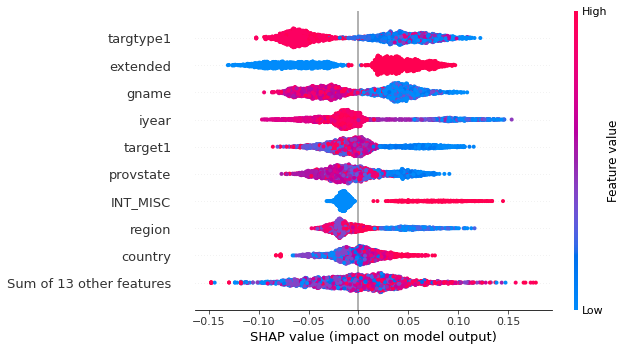

In [169]:
shap.plots.beeswarm(shap_values_rf_ext[:, :, 1])

In [186]:
explainer_rf_ext = shap.TreeExplainer(best_rf_ext)
shap_values_rf_ext = explainer_rf_ext.shap_values(X_test_ext)

In [187]:
shap.initjs()
shap.force_plot(explainer_rf_ext.expected_value[1], shap_values_rf_ext[1][0], X_test_ext.iloc[0])

támadás típusa: 14 - konkrét személy elleni támadás/nyilvánosság ellen és/vagy nyilvános területen elkövetett támadás

támadás célpontja (konkrét ember vagy épület/helyszín): 1565 - Former Sarpanch: Jayanta Majhi

régió: 3 - Dél Amerika

szervezet: 21 - National Liberation Army of Colombia (ELN)

In [188]:
shap.initjs()
shap.force_plot(explainer_rf_ext.expected_value[1], shap_values_rf_ext[1][7], X_test_ext.iloc[7])

imonth = 3 --> márciusban történt a támadás

extended = 0 --> nem tartott 24 óránál tovább

gname = 437 --> szervezet: Islamic State of Iraq and the Levant (ISIL)

targtype1 = 14 --> támadás típusa: konkrét személy elleni támadás/nyilvánosság ellen és/vagy nyilvános területen elkövetett támadás

In [182]:
index=0
for i in label_gname.take(df_model_extended["gname"]):
  if i==497:
    print(index)
  index+=1

3993


In [183]:
df_model_extended.iloc[3993]

iyear          2014.0
imonth            9.0
iday             21.0
extended          1.0
country           6.0
region           10.0
provstate       252.0
specificity       1.0
vicinity          0.0
crit1             1.0
crit2             1.0
crit3             1.0
multiple          0.0
suicide           0.0
attacktype1       6.0
targtype1        18.0
target1        3430.0
natlty1          69.0
gname           497.0
individual        0.0
weaptype1         5.0
INT_MISC          1.0
survived          0.0
class1            0.0
class2            0.0
Name: 8815, dtype: float64

In [185]:
df.iloc[3993]["gname"]

'Islamic State of Iraq and the Levant (ISIL)'

In [189]:
index=0
for i in label_target1.take(df_model_extended["target1"]):
  if i==1565:
    print(index)
  index+=1

1623
1624
1715
1716
1763
1848
1868
1895
2007
2030
2069
2093
2097
2151
2183
2224
2234
2268
2273
2280
2289
2290
2291
2298
2310
2342
2352
2392
2397
2403
2504
2513
2570
2574
2596
2597
2599
2615
2619
2620
2623
2624
2657
2664
2700
2715
2766
2786
2808
2842
2852
2853
2876
2887
2905
2907
2929
2932
2976
3001
3055
3095
3129
3161
3218
3266
3298
3351
3360
3397
3429
3491
3495
3525
3542
3551
3606
3607
3620
3621
3634
3644
3719
3724
3741
3752
3774
3839
3881
3887
3900
3902
3914
3956
3964
3969
3997
4001
4022
4023
4028
4039
4041
4049
4050
4074
4093
4102
4122
4125
4136
4156
4166
4182
4207
4220
4221
4222
4223
4224
4242
4246
4251
4254
4255
4260
4262
4268
4277
4280
4311
4316
4337
4358
4378
4399
4432
4451
4455
4483
4501
4517
4533
4536
4544
4545
4546
4547
4549
4564
4587
4591
4597
4610
4615
4618
4620
4621
4626
4629
4631
4632
4633
4637
4652
4662
4663
4666
4681
4686
4691
4705
4717
4727
4739
4740
4743
4744
4745
4759
4789
4792
4799
4801
4821
4822
4829
4833
4834
4835
4848
4853
4854
4875
4883
4885
4886
4891
4892
4900


In [190]:
df_model_extended.iloc[8032]

iyear          2010.0
imonth            5.0
iday             27.0
extended          1.0
country         104.0
region           11.0
provstate       408.0
specificity       1.0
vicinity          1.0
crit1             1.0
crit2             1.0
crit3             1.0
multiple          0.0
suicide           0.0
attacktype1       2.0
targtype1        14.0
target1        1565.0
natlty1         104.0
gname           377.0
individual        0.0
weaptype1         5.0
INT_MISC          0.0
survived          0.0
class1            0.0
class2            0.0
Name: 16559, dtype: float64

In [191]:
df.iloc[8032]["target1"]

'Former Sarpanch: Jayanta Majhi'